In [134]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
sys.path.append('../baobab') # FIXME: quick workaround until pip packaging
import bnn_priors
from configs.parser import Config
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
cfg = Config.fromfile('../baobab/configs/tdlmc_config.py') # FIXME: quick workaround until pip packaging
meta = pd.read_csv(os.path.join('..', 'baobab', cfg.out_dir, 'metadata.csv'), index_col=None) # FIXME: quick workaround until pip packaging
bnn_prior = getattr(bnn_priors, cfg.bnn_prior_class)(cfg.bnn_omega, cfg.components)

In [136]:
meta.columns

Index(['lens_mass_center_x', 'lens_mass_center_y', 'lens_mass_gamma',
       'lens_mass_theta_E', 'lens_mass_e1', 'lens_mass_e2',
       'external_shear_gamma_ext', 'external_shear_psi_ext', 'src_light_amp',
       'src_light_center_x', 'src_light_center_y', 'src_light_n_sersic',
       'src_light_R_sersic', 'src_light_e1', 'src_light_e2', 'lens_light_amp',
       'lens_light_center_x', 'lens_light_center_y', 'lens_light_n_sersic',
       'lens_light_R_sersic', 'lens_light_e1', 'lens_light_e2',
       'agn_light_amp', 'mag_0', 'mag_1', 'mag_2', 'mag_3', 'x_image_0',
       'x_image_1', 'x_image_2', 'x_image_3', 'y_image_0', 'y_image_1',
       'y_image_2', 'y_image_3', 'n_img'],
      dtype='object')

In [137]:
# Add shear and ellipticity modulus and angle
meta['external_shear_gamma_ext1'] = meta['external_shear_gamma_ext']*np.cos(2.0*meta['external_shear_psi_ext'])
meta['external_shear_gamma_ext2'] = meta['external_shear_gamma_ext']*np.sin(2.0*meta['external_shear_psi_ext'])
for comp in ['lens_mass', 'src_light', 'lens_light']:
    meta['{:s}_ellip'.format(comp)] = np.sqrt(meta['{:s}_e1'.format(comp)]**2.0 + meta['{:s}_e2'.format(comp)]**2.0)
    meta['{:s}_phi'.format(comp)] = 0.5*np.arctan(meta['{:s}_e2'.format(comp)]/meta['{:s}_e1'.format(comp)])    

In [138]:
def plot_prior_samples(eval_at, component, param, unit):
    param_key = '{:s}_{:s}'.format(component, param)
    hyperparams = cfg.bnn_omega[component][param].copy()
    pdf_eval = bnn_prior.eval_param_pdf(eval_at, hyperparams)
    plt.plot(eval_at, pdf_eval, 'r-', lw=2, alpha=0.6, label='PDF')
    binning = np.linspace(eval_at[0], eval_at[-1], 50)
    plt.hist(meta[param_key], bins=binning, edgecolor='k', density=True, align='mid', label='sampled')
    print(hyperparams)
    plt.xlabel("{:s} ({:s})".format(param_key, unit))
    plt.ylabel("density")
    plt.legend()

In [139]:
def plot_derived_quantities(param_key, unit):
    _ = plt.hist(meta[param_key], bins=30, edgecolor='k', density=True, align='mid', label='sampled')
    plt.xlabel("{:s} ({:s})".format(param_key, unit))
    plt.ylabel("density")
    plt.legend()

## Lens mass params

{'mu': 0.0, 'sigma': 0.1, 'log': True}


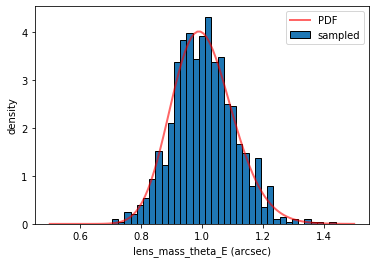

In [71]:
plot_prior_samples(np.linspace(0.5, 1.5, 100), 'lens_mass', 'theta_E', 'arcsec')

{'mu': 0.0, 'sigma': 1e-07}


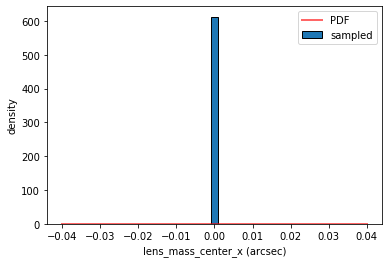

In [72]:
plot_prior_samples(np.linspace(-0.04, 0.04, 100), 'lens_mass', 'center_x', 'arcsec')

{'mu': 0.0, 'sigma': 1e-07}


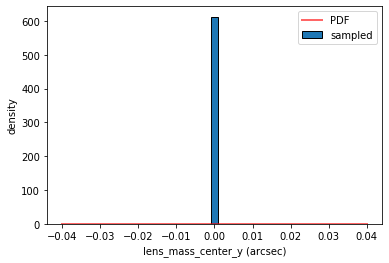

In [73]:
plot_prior_samples(np.linspace(-0.04, 0.04, 100), 'lens_mass', 'center_y', 'arcsec')

{'mu': 0.7, 'sigma': 0.02, 'log': True}


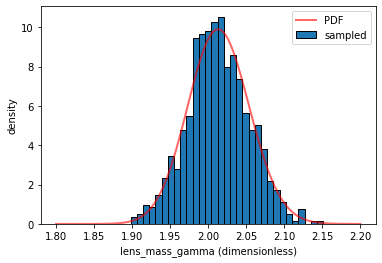

In [74]:
plot_prior_samples(np.linspace(1.8, 2.2, 100), 'lens_mass', 'gamma', 'dimensionless')

{'a': 4.0, 'b': 4.0, 'lower': -0.9, 'upper': 0.9}


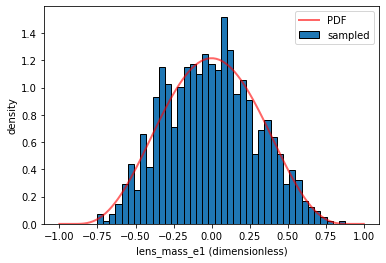

In [75]:
plot_prior_samples(np.linspace(-1.0, 1.0, 100), 'lens_mass', 'e1', 'dimensionless')

{'a': 4.0, 'b': 4.0, 'lower': -0.9, 'upper': 0.9}


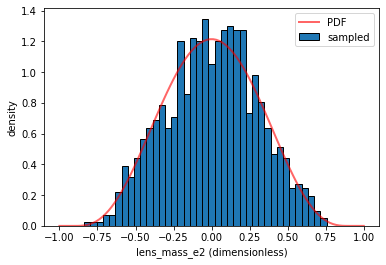

In [76]:
plot_prior_samples(np.linspace(-1.0, 1.0, 100), 'lens_mass', 'e2', 'dimensionless')

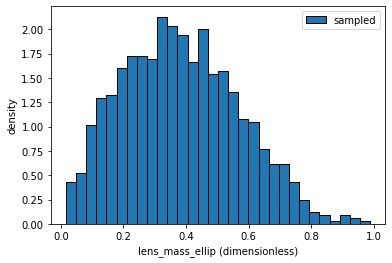

In [77]:
plot_derived_quantities('lens_mass_ellip', 'dimensionless')

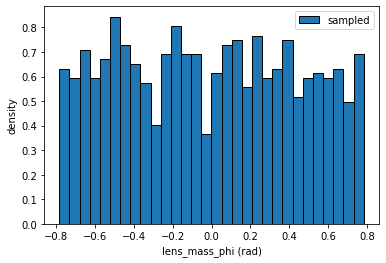

In [78]:
plot_derived_quantities('lens_mass_phi', 'rad')

## External shear params

{'mu': -2.73, 'sigma': 1.05, 'log': True}


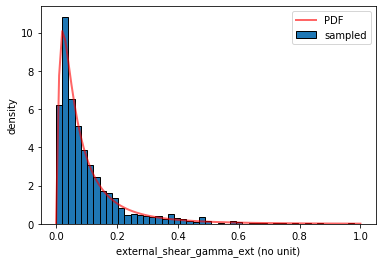

In [79]:
plot_prior_samples(np.linspace(0, 1.0, 100), 'external_shear', 'gamma_ext', 'no unit')

{'mu': 3.141592653589793, 'alpha': 3.141592653589793, 'p': 10.0, 'lower': 0.0, 'upper': 6.283185307179586}


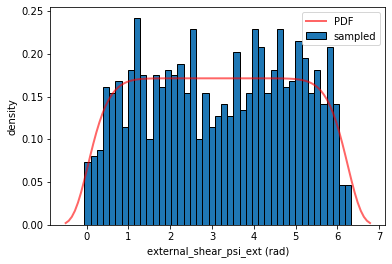

In [87]:
plot_prior_samples(np.linspace(0.0 - 0.5, 2.0*np.pi + 0.5, 100), 'external_shear', 'psi_ext', 'rad')

## Lens light params

{'mu': 3.9, 'sigma': 0.7, 'log': True}


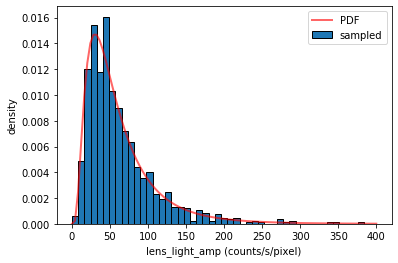

In [88]:
plot_prior_samples(np.linspace(0, 400, 100), 'lens_light', 'amp', 'counts/s/pixel')

{'mu': 1.25, 'sigma': 0.13, 'log': True}


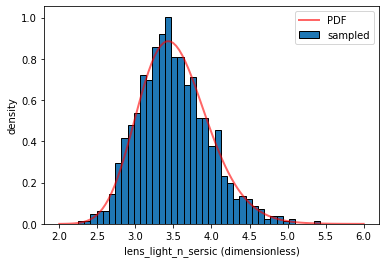

In [89]:
plot_prior_samples(np.linspace(2, 6, 100), 'lens_light', 'n_sersic', 'dimensionless')

{'mu': -0.35, 'sigma': 0.3, 'log': True}


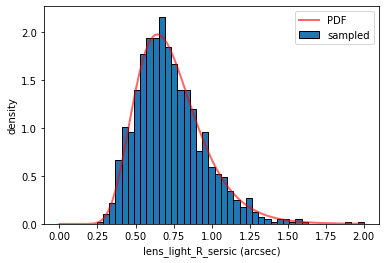

In [91]:
plot_prior_samples(np.linspace(0.0, 2.0, 100), 'lens_light', 'R_sersic', 'arcsec')

{'a': 4.0, 'b': 4.0, 'lower': -0.9, 'upper': 0.9}


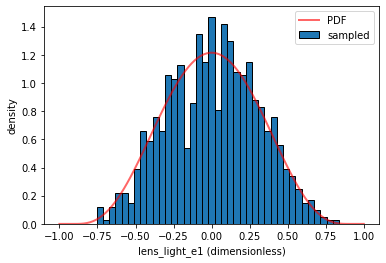

In [92]:
plot_prior_samples(np.linspace(-1.0, 1.0, 100), 'lens_light', 'e1', 'dimensionless')

{'a': 4.0, 'b': 4.0, 'lower': -0.9, 'upper': 0.9}


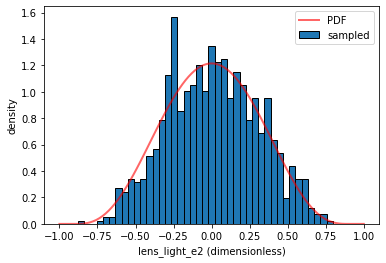

In [93]:
plot_prior_samples(np.linspace(-1.0, 1.0, 100), 'lens_light', 'e2', 'dimensionless')

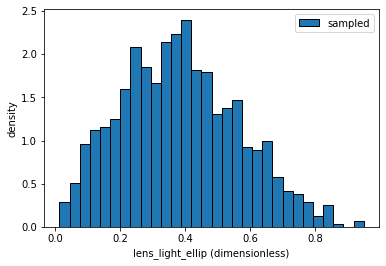

In [96]:
plot_derived_quantities('lens_light_ellip', 'dimensionless')

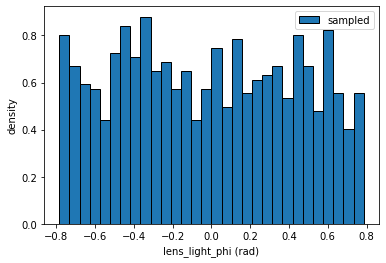

In [94]:
plot_derived_quantities('lens_light_phi', 'rad')

## Source light params

{'mu': 5.0, 'sigma': 0.3, 'log': True}


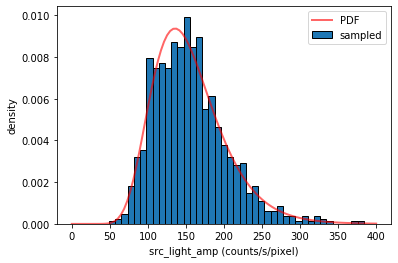

In [97]:
plot_prior_samples(np.linspace(0, 400, 100), 'src_light', 'amp', 'counts/s/pixel')

{'mu': 1.1, 'sigma': 0.2, 'log': True}


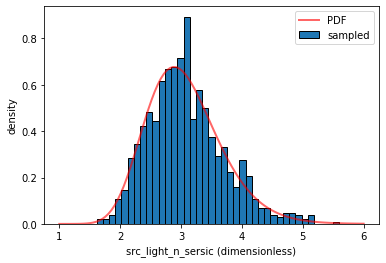

In [99]:
plot_prior_samples(np.linspace(1.0, 6.0, 100), 'src_light', 'n_sersic', 'dimensionless')

{'mu': -0.7, 'sigma': 0.4, 'log': True}


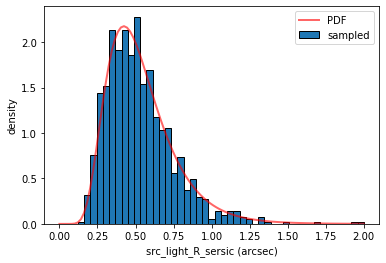

In [100]:
plot_prior_samples(np.linspace(0.0, 2.0, 100), 'src_light', 'R_sersic', 'arcsec')

{'mu': 0.0, 'alpha': 0.03, 'p': 10.0}


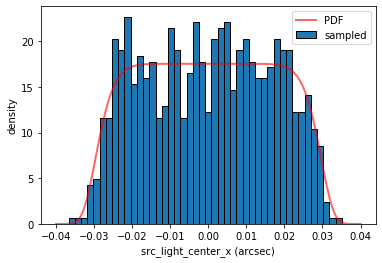

In [114]:
plot_prior_samples(np.linspace(-0.04, 0.04, 100), 'src_light', 'center_x', 'arcsec')

{'mu': 0.0, 'alpha': 0.03, 'p': 10.0}


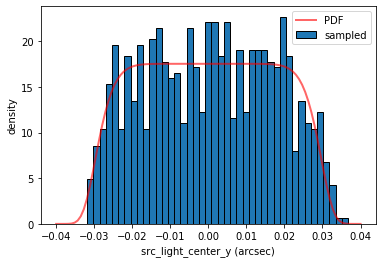

In [115]:
plot_prior_samples(np.linspace(-0.04, 0.04, 100), 'src_light', 'center_y', 'arcsec')

{'a': 4.0, 'b': 4.0, 'lower': -0.9, 'upper': 0.9}


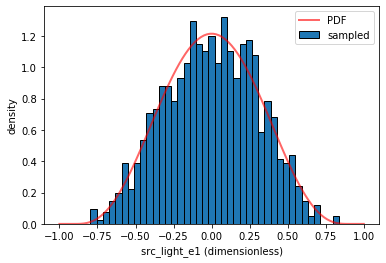

In [101]:
plot_prior_samples(np.linspace(-1.0, 1.0, 100), 'src_light', 'e1', 'dimensionless')

{'a': 4.0, 'b': 4.0, 'lower': -0.9, 'upper': 0.9}


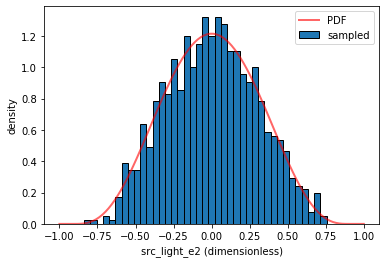

In [102]:
plot_prior_samples(np.linspace(-1.0, 1.0, 100), 'src_light', 'e2', 'dimensionless')

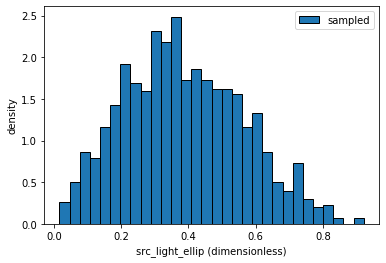

In [103]:
plot_derived_quantities('src_light_ellip', 'dimensionless')

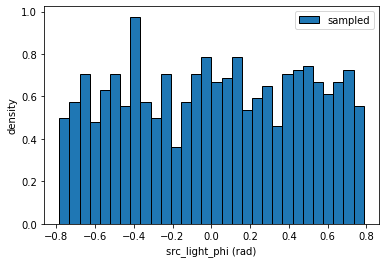

In [105]:
plot_derived_quantities('src_light_phi', 'rad')

In [143]:
meta['src_dist'] = np.sqrt((meta['lens_mass_center_x'] - meta['src_light_center_x'])**2.0 + 
                                         (meta['lens_mass_center_y'] - meta['src_light_center_y'])**2.0) 
for i in range(4):
    meta['img_dist_{:d}'.format(i)] = np.sqrt(meta['x_image_{:d}'.format(i)]**2.0 + 
                                              meta['y_image_{:d}'.format(i)]**2.0)

/home/jwp/miniconda3/envs/baobab/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jwp/miniconda3/envs/baobab/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


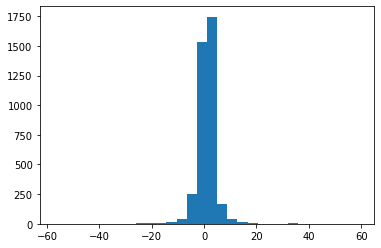

In [152]:
_ = plt.hist(np.concatenate([meta['mag_0'], meta['mag_1'], meta['mag_2'], meta['mag_3']]), bins=30) 

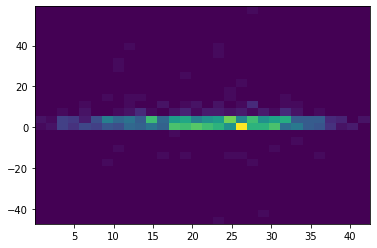

In [147]:
_ = plt.hist2d(meta['src_dist']*1000.0, meta['mag_0'], bins=30)
plt.xlabel('source position offset from lens (arcsec)')
plt.ylabel('magnification')

Text(0, 0.5, 'magnification')

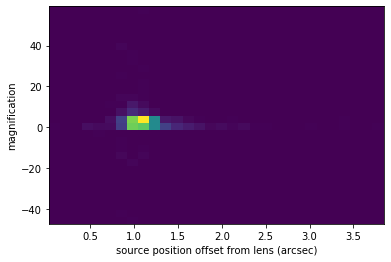

In [148]:
_ = plt.hist2d(meta['img_dist_0'], meta['mag_0'], bins=30)
plt.xlabel('source position offset from lens (arcsec)')
plt.ylabel('magnification')

## AGN light params

{'mu': 3.5, 'sigma': 0.3, 'log': True}


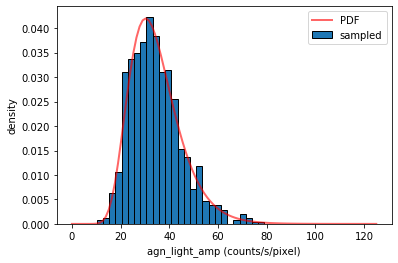

In [118]:
plot_prior_samples(np.linspace(0.0, 125, 100), 'agn_light', 'amp', 'counts/s/pixel')